# Classification

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

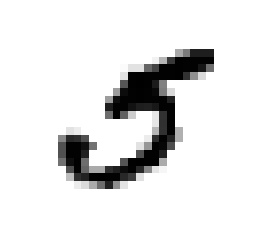

In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

In [6]:
some_digit_image.shape

(28, 28)

In [7]:
some_digit_image.ravel().shape

(784,)

In [8]:
some_digit_image.reshape(784,1).shape

(784, 1)

In [9]:
some_digit_image.reshape(1,-1).shape

(1, 784)

In [10]:
y[36000]

5.0

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row

In [12]:
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

In [13]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning)

In [26]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) ########### 
# The SGDClassifier uses a threshold equal to 0

sgd_clf.fit(X_train, y_train_5)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

### Performance Measures

### Measuring Accuracy Using Cross-Validation

In [16]:
len(y_train_5) - sum(y_train_5)
# not 5

54579

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
# .2 test automatic , i think
# 54579 non-5
# The StratifiedKFold class performs stratified sampling (as explained in Chapter 2) to produce folds that contain a representative ratio of each class.

for train_index, test_index in skfolds.split(X_train, y_train_5):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.9502, 0.96565 and 0.96495

TRAIN: 40000 TEST: 20000


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96755
TRAIN: 40000 TEST: 20000


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9586
TRAIN: 40000 TEST: 20000


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9617


In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([ 0.96755,  0.9586 ,  0.9617 ])

Wow! Above 95% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class:

In [19]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# falses with y_train = we find out the accuracy of falses in the dataset

array([ 0.90605,  0.9079 ,  0.915  ])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. 

### Confusion Matrix

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53364,  1215],
       [ 1028,  4393]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

```python
>>> confusion_matrix(y_train_5, y_train_perfect_predictions)
array([[54579,    0],
       [    0, 5421]])
```

In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == 4393 / (4393 + 1215)

0.78334522111269611

In [24]:
recall_score(y_train_5, y_train_pred) # == 4393 / (4393 + 1028)

0.81036709094263049

Now your 5-detector does not look as shiny as it did when you looked at its accuracy. 

When it claims an image represents a 5, it is correct only 78% of the time (pricision - correctly predicted). Moreover, it only detects 81% of the 5s (related to actuals).

$F1_{score}$ the classifier will only get a high F1 score if both recall and precision are high.

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.79662707407743227

### Precision/Recall Tradeoff

In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 32035.43288373])

In [29]:
threshold = 0

In [30]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [31]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

how can you decide which threshold to use?

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [34]:
precisions

array([ 0.09060823,  0.09059303,  0.09059455, ...,  1.        ,
        1.        ,  1.        ])

In [35]:
recalls

array([  1.00000000e+00,   9.99815532e-01,   9.99815532e-01, ...,
         3.68935621e-04,   1.84467810e-04,   0.00000000e+00])

In [36]:
thresholds

array([-1839599.95099066, -1835256.06369137, -1830769.29263521, ...,
         996154.15723867,  1053598.95548777,  1061395.12858678])

In [46]:
recalls

array([  1.00000000e+00,   9.99815532e-01,   9.99815532e-01, ...,
         3.68935621e-04,   1.84467810e-04,   0.00000000e+00])

In [47]:
recalls[:-1].shape

(59829,)

In [50]:
recalls.shape

(59830,)

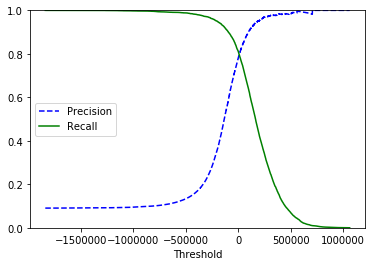

In [37]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Precision and recall versus the decision threshold

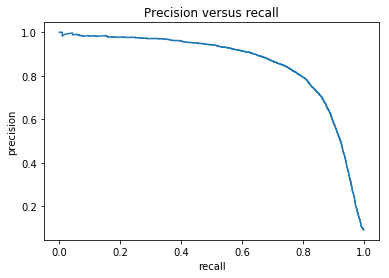

In [60]:
plt.plot(recalls[:-1], precisions[:-1], "-")
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision versus recall");

In [61]:
y_train_pred_90 = (y_scores > 70000) # threshold 70000 to get 80% precision

In [62]:
precision_score(y_train_5, y_train_pred_90)

0.87423887587822013

In [63]:
recall_score(y_train_5, y_train_pred_90)

0.6886183361003505

Great! BUT A high-precision classifier is not very useful if its recall is too low!

### The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.

FPR = The FPR is the ratio of negative instances that are incorrectly classified as positive.

$$ \frac{FP}{(TN + FP)}  $$

It is equal to one minus the true negative rate

In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

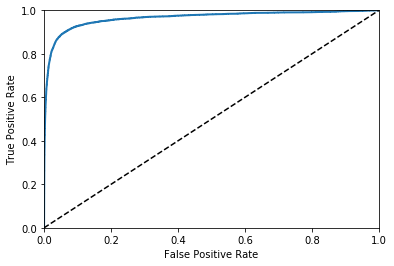

In [66]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces

a good classifier stays as far away from the dotted line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.96511403741633417

In [68]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42) #########

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [71]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

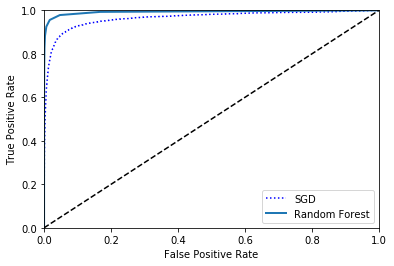

In [72]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [73]:
roc_auc_score(y_train_5, y_scores_forest)

0.99281519357447845

 the RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: it comes much closer to the top-left corner.

Try measuring the precision and recall scores

In [74]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

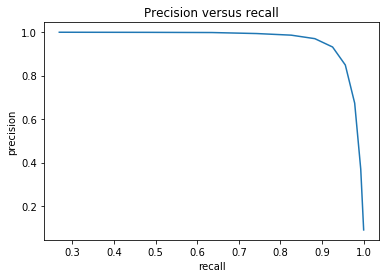

In [75]:
plt.plot(recalls_forest[:-1], precisions_forest[:-1], "-")
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision versus recall");

In [76]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [77]:
precision_score(y_train_5, y_train_pred_forest) 

0.98590618806430297

In [79]:
recall_score(y_train_5, y_train_pred_forest)

0.82586238701346615

we find 98.5% precision and 82.8% recall. Not too bad!

## Multiclass Classification

In [80]:
sgd_clf.fit(X_train, y_train)  # y_train, not y_train_5

sgd_clf.predict([some_digit])

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 5.])

Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.

In [81]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-198139.82867967, -402236.67077575, -210428.75488325,
         -72028.23256251, -439629.92212202,   32035.43288373,
        -913748.7940164 , -269072.82496517, -645843.33227236,
        -712392.5984063 ]])

In [82]:
np.argmax(some_digit_scores)

5

In [83]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [84]:
sgd_clf.classes_[5]

5.0